# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

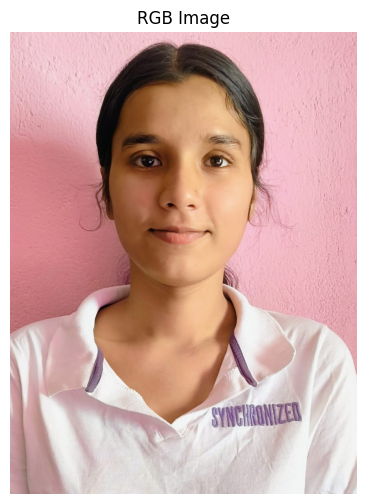

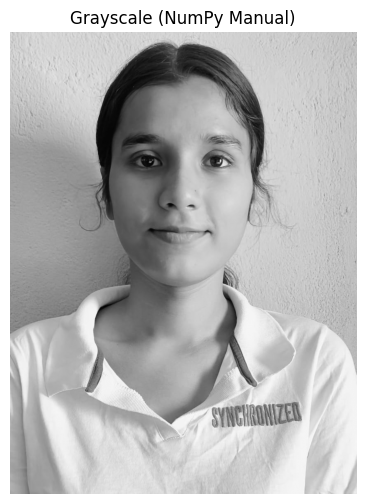

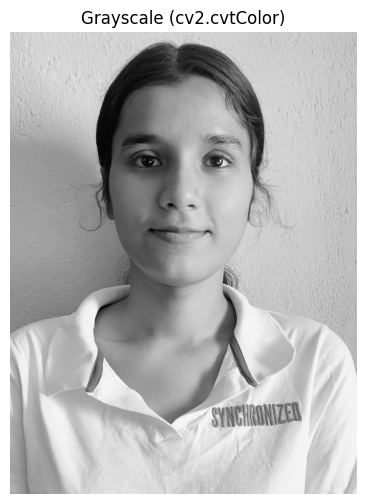

SHAPES:
  RGB image shape        : (1124, 843, 3)
  Grayscale (NumPy) shape: (1124, 843)
  Grayscale (cv2) shape  : (1124, 843)

PIXEL VALUES:
  Pixel (562,421): RGB = [229, 171, 133], Gray (NumPy) = 184, Gray (cv2) = 184
  Pixel (50,50): RGB = [237, 195, 205], Gray (NumPy) = 208, Gray (cv2) = 209
  Pixel (100,200): RGB = [222, 179, 189], Gray (NumPy) = 192, Gray (cv2) = 193
  Max diff 1
  Mean diff 0.5083268955560339
  Non-zero diff pixels: 481656
  Total pixels: 947532


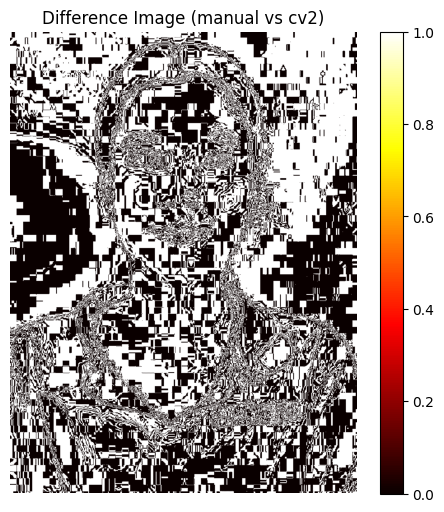

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/WhatsApp Image 2025-12-12 at 8.21.17 PM.jpeg"

img_bgr = cv2.imread(img_path)
# BGR → RGB for correct display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("RGB Image")
plt.imshow(img_rgb)
plt.axis("off")
plt.show()
#weighted grayscale conversion
R = img_rgb[:, :, 0].astype(np.float32)
G = img_rgb[:, :, 1].astype(np.float32)
B = img_rgb[:, :, 2].astype(np.float32)

gray_np = (0.299 * R + 0.587 * G + 0.114 * B)
gray_np = np.clip(gray_np, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.title("Grayscale (NumPy Manual)")
plt.imshow(gray_np, cmap="gray")
plt.axis("off")
plt.show()

#grayscale using cv2.cvtColor
gray_cv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.title("Grayscale (cv2.cvtColor)")
plt.imshow(gray_cv, cmap="gray")
plt.axis("off")
plt.show()

#array shapes
print("SHAPES:")
print("  RGB image shape        :", img_rgb.shape)
print("  Grayscale (NumPy) shape:", gray_np.shape)
print("  Grayscale (cv2) shape  :", gray_cv.shape)

#example pixle values
H, W = gray_np.shape
samples = [
    (H//2, W//2),
    (50, 50),
    (100, 200)
]

print("\nPIXEL VALUES:")
for (r, c) in samples:
    rgb_val = img_rgb[r, c]
    print(f"  Pixel ({r},{c}): RGB = {rgb_val.tolist()}, "
          f"Gray (NumPy) = {int(gray_np[r,c])}, "
          f"Gray (cv2) = {int(gray_cv[r,c])}")
# 7. Comparision
diff = cv2.absdiff(gray_np, gray_cv)
print("  Max diff", int(diff.max()))
print("  Mean diff", float(diff.mean()))
print("  Non-zero diff pixels:", int(np.count_nonzero(diff)))
print("  Total pixels:", H * W)

plt.figure(figsize=(6,6))
plt.title("Difference Image (manual vs cv2)")
plt.imshow(diff, cmap="hot")
plt.colorbar()
plt.axis("off")
plt.show()


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

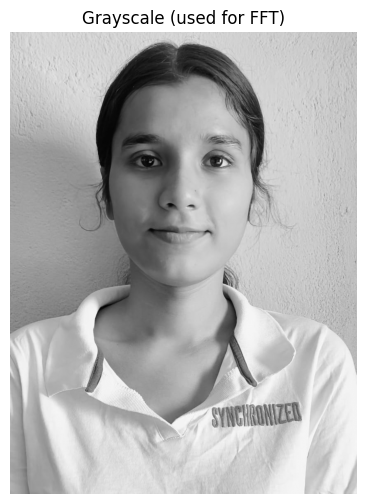

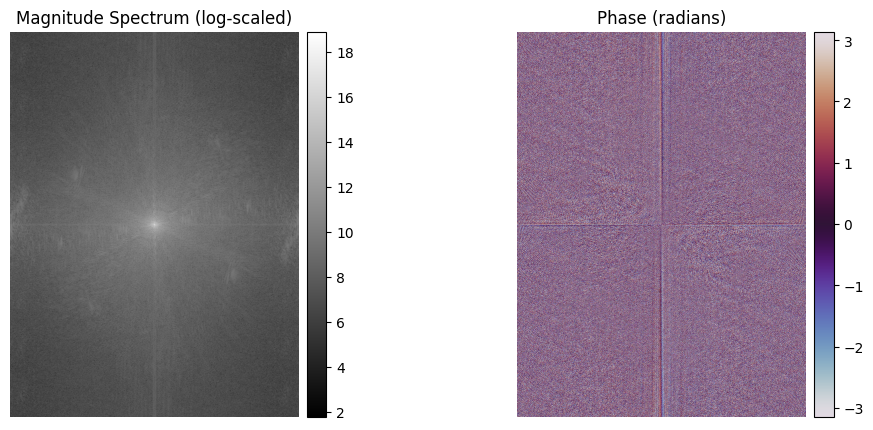

Shapes:
  grayscale shape : (1124, 843)
  FFT (f) shape   : (1124, 843)
  fshift shape    : (1124, 843)
  magnitude shape : (1124, 843)
  phase shape     : (1124, 843)

Sample (row,col) values — magnitude (linear), magnitude_log, phase (radians):
  (562, 421): mag = 1.640e+08, mag_log = 18.915531, phase = -0.000000
  (50, 50): mag = 8.320e+02, mag_log = 6.725087, phase = -2.625754
  (100, 100): mag = 2.265e+03, mag_log = 7.725843, phase = 2.176497

Magnitude stats (linear): min, max, mean
4.904386043548584 164025232.0 6607.36181640625

Magnitude_log stats: min, max, mean
1.7756954431533813 18.915531158447266 7.8201680183410645


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/WhatsApp Image 2025-12-12 at 8.21.17 PM.jpeg"

img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError(f"ERROR: Could not load image from {img_path}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

R = img_rgb[:, :, 0].astype(np.float32)
G = img_rgb[:, :, 1].astype(np.float32)
B = img_rgb[:, :, 2].astype(np.float32)

gray = (0.299 * R + 0.587 * G + 0.114 * B)
gray = np.clip(gray, 0, 255).astype(np.uint8)

plt.figure(figsize=(6,6))
plt.title("Grayscale (used for FFT)")
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

f = np.fft.fft2(gray.astype(np.float32))
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
phase = np.angle(fshift)

magnitude_log = np.log1p(magnitude)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Magnitude Spectrum (log-scaled)")
plt.imshow(magnitude_log, cmap="gray")
plt.axis("off")
plt.colorbar(fraction=0.046, pad=0.02)

plt.subplot(1,2,2)
plt.title("Phase (radians)")
plt.imshow(phase, cmap="twilight", vmin=-np.pi, vmax=np.pi)
plt.axis("off")
plt.colorbar(fraction=0.046, pad=0.02)

plt.show()
print("Shapes:")
print("  grayscale shape :", gray.shape)
print("  FFT (f) shape   :", f.shape)
print("  fshift shape    :", fshift.shape)
print("  magnitude shape :", magnitude.shape)
print("  phase shape     :", phase.shape)

H, W = magnitude.shape
center = (H//2, W//2)
samples = [
    center,
    (min(50, H-1), min(50, W-1)),
    (min(100, H-1), min(100, W-1))
]

print("\nSample (row,col) values — magnitude (linear), magnitude_log, phase (radians):")
for (r, c) in samples:
    mag_val = float(magnitude[r, c])
    mag_log_val = float(magnitude_log[r, c])
    ph_val = float(phase[r, c])
    print(f"  {r,c}: mag = {mag_val:.3e}, mag_log = {mag_log_val:.6f}, phase = {ph_val:.6f}")

print("\nMagnitude stats (linear): min, max, mean")
print(float(magnitude.min()), float(magnitude.max()), float(magnitude.mean()))
print("\nMagnitude_log stats: min, max, mean")
print(float(magnitude_log.min()), float(magnitude_log.max()), float(magnitude_log.mean()))


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

Image loaded: shape (H,W) = (1124,843)


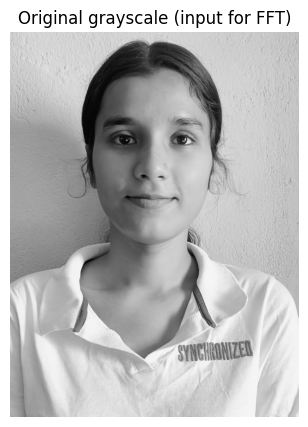


--- Part C1: Circular LPFs and reconstructions ---
Radius = 10: MSE vs original = 413.013


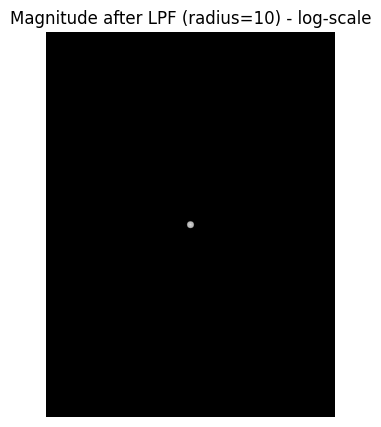

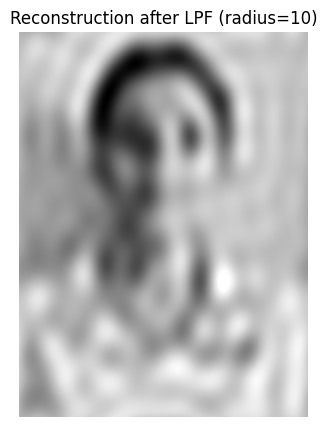

Radius = 30: MSE vs original = 137.370


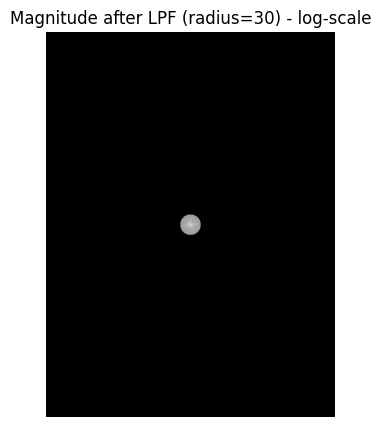

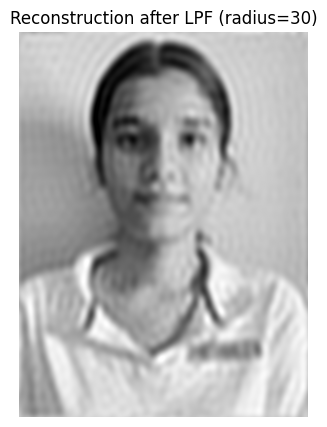

Radius = 80: MSE vs original = 57.375


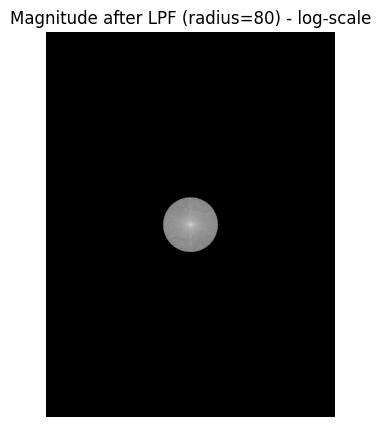

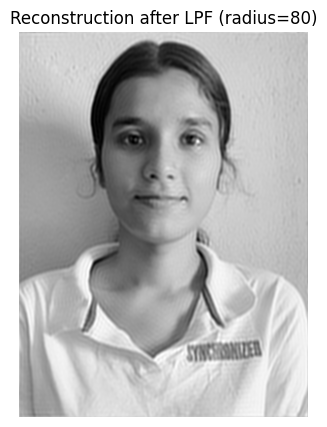


--- Part C2: High-Pass Filter (complement of LPF radius 30) ---
HPF MSE vs original = 31430.354


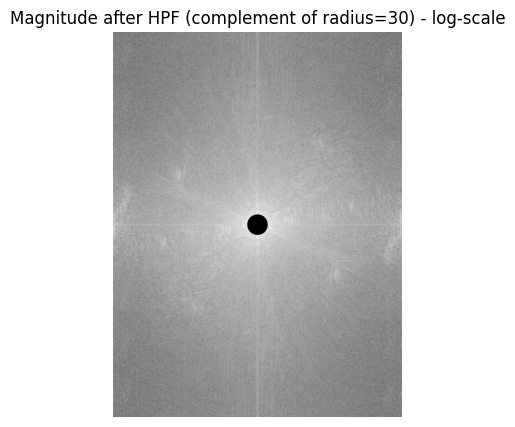

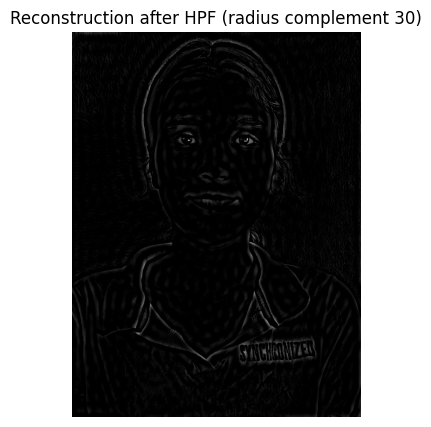


--- Part C3: Square LPF (side=50) ---
Square LPF MSE vs original = 147.744


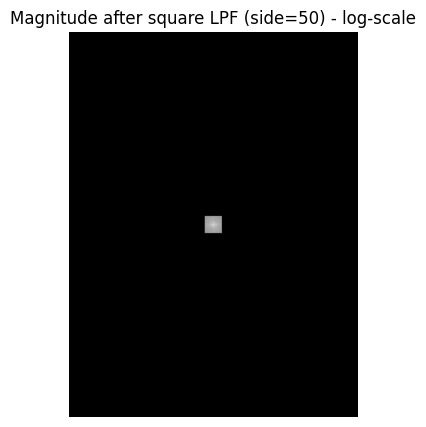

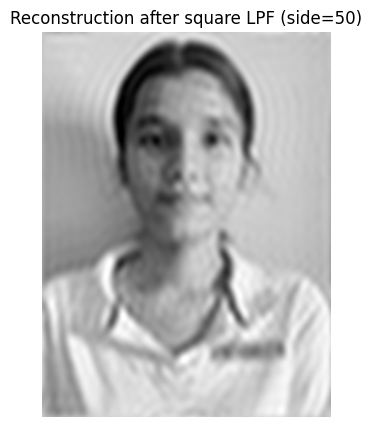


Summary of reconstructions (MSE lower => closer to original):
  Circular LPF radius 10: MSE = 413.013
  Circular LPF radius 30: MSE = 137.370
  Circular LPF radius 80: MSE = 57.375
  HPF (complement of radius 30): MSE = 31430.354
  Square LPF side 50: MSE = 147.744


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path = "/content/WhatsApp Image 2025-12-12 at 8.21.17 PM.jpeg"

img_bgr = cv2.imread(img_path)
if img_bgr is None:
    raise ValueError(f"ERROR: Could not load image from {img_path}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
R = img_rgb[:,:,0].astype(np.float32)
G = img_rgb[:,:,1].astype(np.float32)
B = img_rgb[:,:,2].astype(np.float32)
gray = (0.299*R + 0.587*G + 0.114*B)
gray = np.clip(gray, 0, 255).astype(np.uint8)

H, W = gray.shape
print(f"Image loaded: shape (H,W) = ({H},{W})")

f = np.fft.fft2(gray.astype(np.float32))
fshift = np.fft.fftshift(f)

def show(img, title="", cmap='gray', figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

show(gray, "Original grayscale (input for FFT)", figsize=(5,5))

def circular_lpf_mask(shape, radius):
    H, W = shape
    cy, cx = H//2, W//2
    y = np.arange(H) - cy
    x = np.arange(W) - cx
    X, Y = np.meshgrid(x, y)
    D = np.sqrt(X**2 + Y**2)
    mask = (D <= radius).astype(np.float32)
    return mask

def reconstruct_from_mask(fshift, mask):
    fshift_filtered = fshift * mask
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back_complex = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back_complex)
    img_back_clipped = np.clip(img_back, 0, 255).astype(np.uint8)
    return img_back_clipped, fshift_filtered
radii = [10, 30, 80]
reconstructions = []
masks = []

print("\n--- Part C1: Circular LPFs and reconstructions ---")
for r in radii:
    mask = circular_lpf_mask((H,W), radius=r)
    recon_img, fshift_filt = reconstruct_from_mask(fshift, mask)
    reconstructions.append((r, recon_img))
    masks.append((r, mask))
    mse = np.mean((gray.astype(np.float32) - recon_img.astype(np.float32))**2)
    print(f"Radius = {r}: MSE vs original = {mse:.3f}")
    magnitude_masked = np.log1p(np.abs(fshift_filt))
    show(magnitude_masked, title=f"Magnitude after LPF (radius={r}) - log-scale", figsize=(5,5))
    show(recon_img, title=f"Reconstruction after LPF (radius={r})", figsize=(5,5))

hpf_radius = 30
lpf30 = circular_lpf_mask((H,W), radius=hpf_radius)
hpf_mask = 1.0 - lpf30
recon_hpf, fshift_hpf = reconstruct_from_mask(fshift, hpf_mask)
mse_hpf = np.mean((gray.astype(np.float32) - recon_hpf.astype(np.float32))**2)
print(f"\n--- Part C2: High-Pass Filter (complement of LPF radius {hpf_radius}) ---")
print(f"HPF MSE vs original = {mse_hpf:.3f}")

show(np.log1p(np.abs(fshift_hpf)), title=f"Magnitude after HPF (complement of radius={hpf_radius}) - log-scale", figsize=(5,5))
show(recon_hpf, title=f"Reconstruction after HPF (radius complement {hpf_radius})", figsize=(5,5))

square_side = 50
mask_square = np.zeros((H,W), dtype=np.float32)
cy, cx = H//2, W//2
half = square_side // 2
r0 = max(0, cy - half)
r1 = min(H, cy - half + square_side)
c0 = max(0, cx - half)
c1 = min(W, cx - half + square_side)
mask_square[r0:r1, c0:c1] = 1.0

recon_square, fshift_square = reconstruct_from_mask(fshift, mask_square)
mse_square = np.mean((gray.astype(np.float32) - recon_square.astype(np.float32))**2)

print(f"\n--- Part C3: Square LPF (side={square_side}) ---")
print(f"Square LPF MSE vs original = {mse_square:.3f}")
show(np.log1p(np.abs(fshift_square)), title=f"Magnitude after square LPF (side={square_side}) - log-scale", figsize=(5,5))
show(recon_square, title=f"Reconstruction after square LPF (side={square_side})", figsize=(5,5))

print("\nSummary of reconstructions (MSE lower => closer to original):")
for r, _ in reconstructions:
    mse = np.mean((gray.astype(np.float32) - reconstructions[[i for i,(rr,_) in enumerate(reconstructions) if rr==r][0]][1].astype(np.float32))**2)
    print(f"  Circular LPF radius {r}: MSE = {mse:.3f}")

print(f"  HPF (complement of radius {hpf_radius}): MSE = {mse_hpf:.3f}")
print(f"  Square LPF side {square_side}: MSE = {mse_square:.3f}")

# Optionally, if you want to save reconstructions to disk inside Colab:
# cv2.imwrite("/mnt/data/recon_lpf_r10.png", reconstructions[0][1])
# cv2.imwrite("/mnt/data/recon_lpf_r30.png", reconstructions[1][1])
# cv2.imwrite("/mnt/data/recon_lpf_r80.png", reconstructions[2][1])
# cv2.imwrite("/mnt/data/recon_hpf_r30_complement.png", recon_hpf)
# cv2.imwrite("/mnt/data/recon_square50.png", recon_square)


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

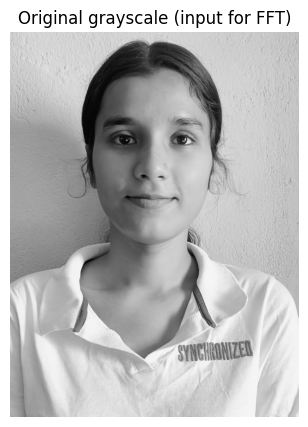

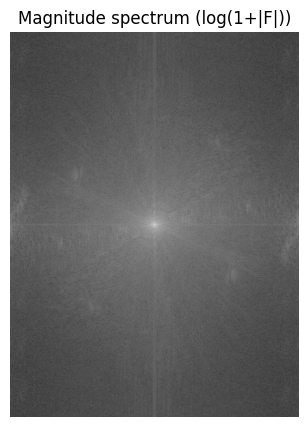

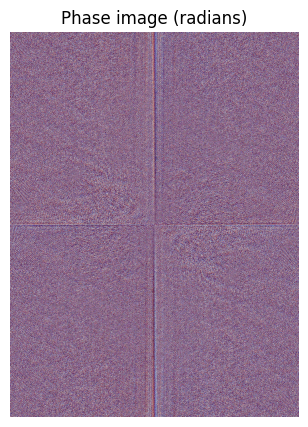

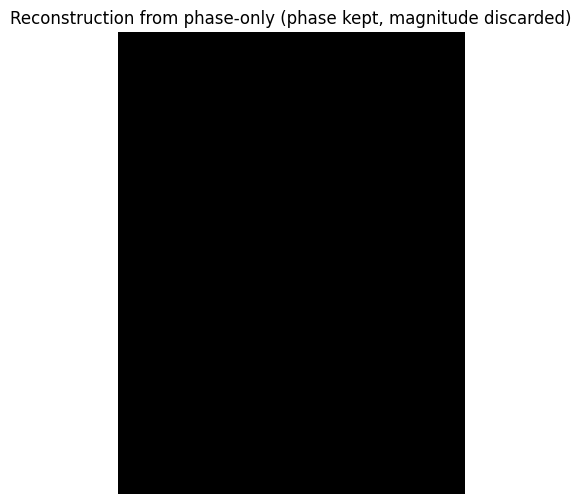

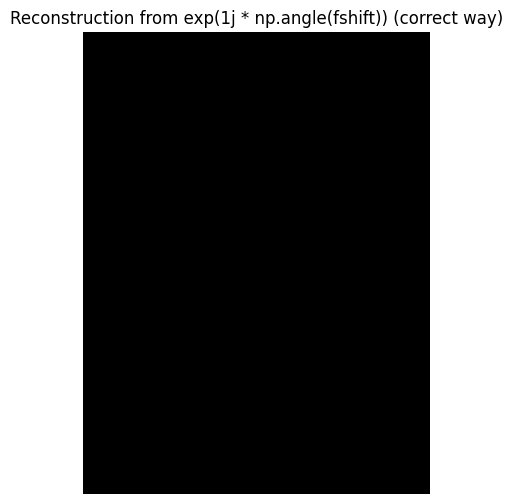

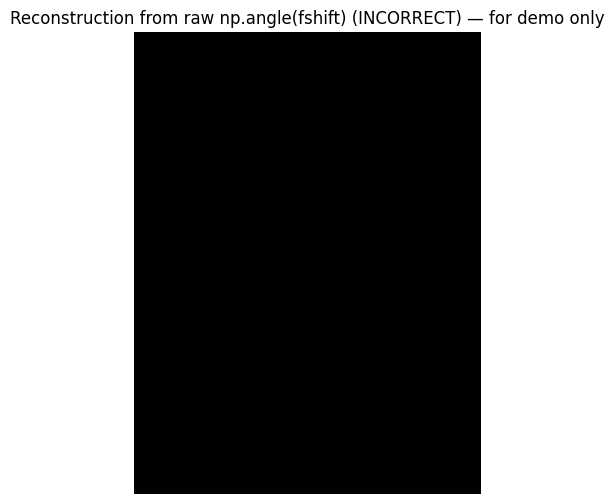


D1 explanation summary:
- 'phase_only = fshift / np.abs(fshift)' makes complex numbers with magnitude 1 and keeps only phase.
- 'np.angle(fshift)' returns the phase values as REAL numbers (radians).
- To reconstruct from angles you must convert them back to complex phasors: np.exp(1j * angle).
- Feeding raw angles directly into inverse FFT is incorrect because inverse FFT expects complex frequency coefficients (amplitude * phase).


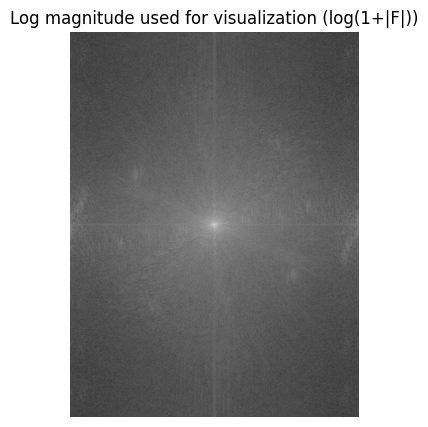

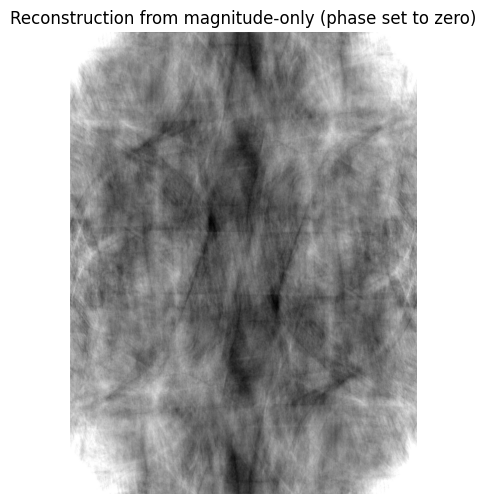


D2 explanation summary:
- Magnitude-only reconstruction loses phase, so the result is usually not recognizable (it looks blurred/blob-like).
- We use log(1 + |F|) when visualizing magnitude so that small frequency components become visible instead of being overwhelmed by the large ones at the center.

Simple MSE values (lower => closer to original grayscale):
  MSE (phase-only reconstruction)    = 32572.490
  MSE (magnitude-only reconstruction) = 2672.586


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title="", cmap=None, size=(5,5)):
    plt.figure(figsize=size)
    plt.title(title)
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()

def to_uint8(arr):
    return np.clip(arr, 0, 255).astype(np.uint8)

def reconstruct_from_shifted(spectrum_shifted):
    """Given a shifted complex spectrum, do inverse shift + ifft2 -> return uint8 image."""
    f_ishift = np.fft.ifftshift(spectrum_shifted)
    img_back_complex = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back_complex)
    return to_uint8(img_back)

img_path = "/content/WhatsApp Image 2025-12-12 at 8.21.17 PM.jpeg"
bgr = cv2.imread(img_path)
if bgr is None:
    raise FileNotFoundError(f"Could not load image at {img_path}")
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

R = rgb[:, :, 0].astype(np.float32)
G = rgb[:, :, 1].astype(np.float32)
B = rgb[:, :, 2].astype(np.float32)
gray = 0.299 * R + 0.587 * G + 0.114 * B
gray = to_uint8(gray)

show(gray, "Original grayscale (input for FFT)", cmap="gray", size=(5,5))

f = np.fft.fft2(gray.astype(np.float32))
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
phase = np.angle(fshift)
show(np.log1p(magnitude), "Magnitude spectrum (log(1+|F|))", cmap="gray", size=(5,5))
show(phase, "Phase image (radians)", cmap="twilight", size=(5,5))

eps = 1e-12
mag_safe = magnitude.copy()
mag_safe[mag_safe == 0] = eps

phase_only = fshift / mag_safe
recon_phase_only = reconstruct_from_shifted(phase_only)
show(recon_phase_only, "Reconstruction from phase-only (phase kept, magnitude discarded)", cmap="gray", size=(6,6))

phasors_from_angle = np.exp(1j * np.angle(fshift))
recon_from_exp_angle = reconstruct_from_shifted(phasors_from_angle)
show(recon_from_exp_angle, "Reconstruction from exp(1j * np.angle(fshift)) (correct way)", cmap="gray", size=(6,6))

angle_raw = np.angle(fshift)
try:
    recon_from_raw_angle = reconstruct_from_shifted(angle_raw)
    show(recon_from_raw_angle, "Reconstruction from raw np.angle(fshift) (INCORRECT) — for demo only", cmap="gray", size=(6,6))
except Exception as e:
    print("Reconstruction from raw angles failed or produced garbage (expected). Error/message:", e)

print("\nD1 explanation summary:")
print("- 'phase_only = fshift / np.abs(fshift)' makes complex numbers with magnitude 1 and keeps only phase.")
print("- 'np.angle(fshift)' returns the phase values as REAL numbers (radians).")
print("- To reconstruct from angles you must convert them back to complex phasors: np.exp(1j * angle).")
print("- Feeding raw angles directly into inverse FFT is incorrect because inverse FFT expects complex frequency coefficients (amplitude * phase).")


mag_only = magnitude.copy()
mag_only_complex = mag_only.astype(np.complex64)

recon_mag_only = reconstruct_from_shifted(mag_only_complex)
show(np.log1p(mag_only), "Log magnitude used for visualization (log(1+|F|))", cmap="gray", size=(5,5))
show(recon_mag_only, "Reconstruction from magnitude-only (phase set to zero)", cmap="gray", size=(6,6))


print("\nD2 explanation summary:")
print("- Magnitude-only reconstruction loses phase, so the result is usually not recognizable (it looks blurred/blob-like).")
print("- We use log(1 + |F|) when visualizing magnitude so that small frequency components become visible instead of being overwhelmed by the large ones at the center.")

def mse(a, b):
    return np.mean((a.astype(np.float32) - b.astype(np.float32))**2)

mse_phase = mse(gray, recon_phase_only)
mse_mag = mse(gray, recon_mag_only)

print("\nSimple MSE values (lower => closer to original grayscale):")
print(f"  MSE (phase-only reconstruction)    = {mse_phase:.3f}")
print(f"  MSE (magnitude-only reconstruction) = {mse_mag:.3f}")



## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

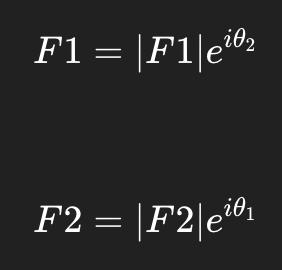

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

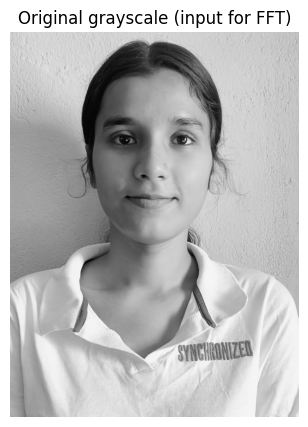

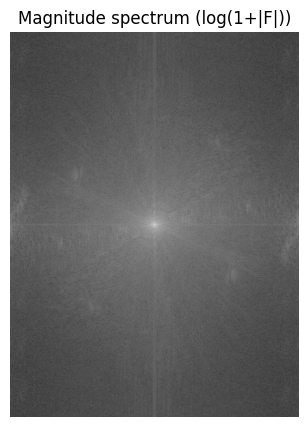

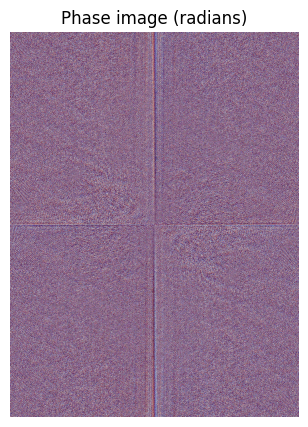

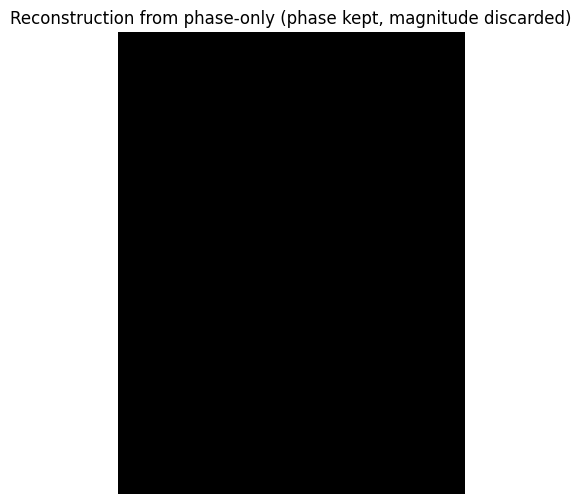

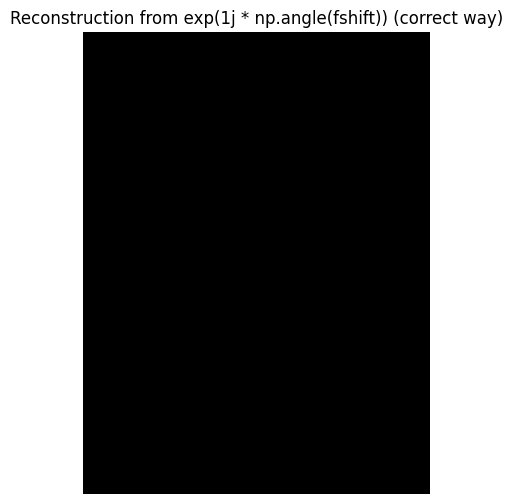

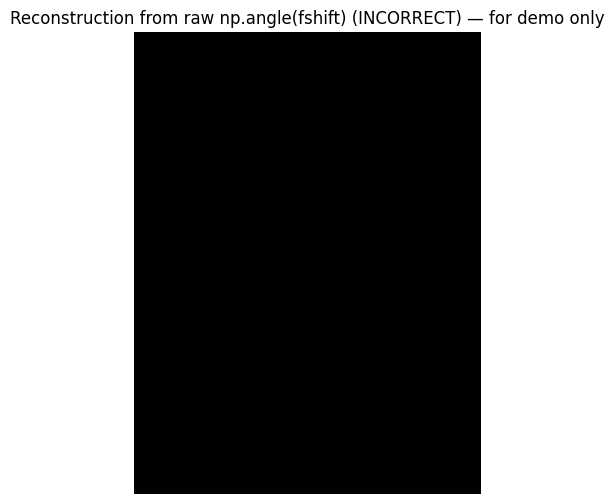


D1 explanation summary:
- 'phase_only = fshift / np.abs(fshift)' makes complex numbers with magnitude 1 and keeps only phase.
- 'np.angle(fshift)' returns the phase values as REAL numbers (radians).
- To reconstruct from angles you must convert them back to complex phasors: np.exp(1j * angle).
- Feeding raw angles directly into inverse FFT is incorrect because inverse FFT expects complex frequency coefficients (amplitude * phase).


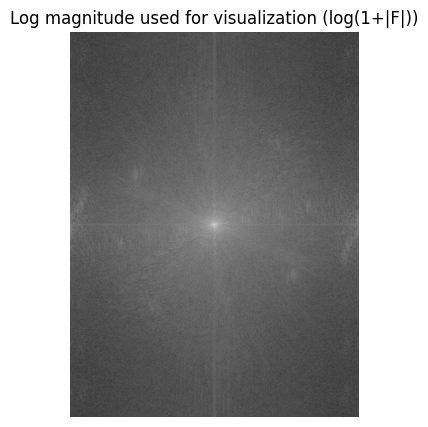

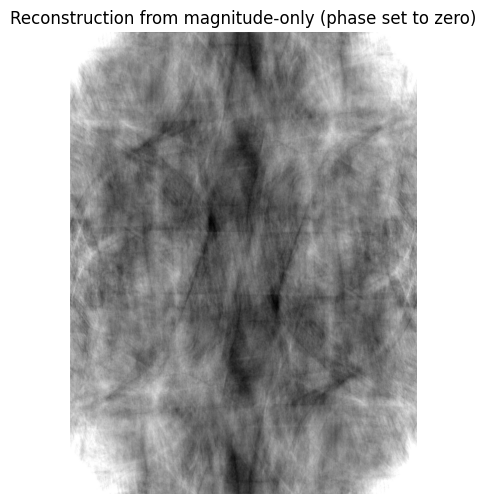


D2 explanation summary:
- Magnitude-only reconstruction loses phase, so the result is usually not recognizable (it looks blurred/blob-like).
- We use log(1 + |F|) when visualizing magnitude so that small frequency components become visible instead of being overwhelmed by the large ones at the center.

Simple MSE values (lower => closer to original grayscale):
  MSE (phase-only reconstruction)    = 32572.490
  MSE (magnitude-only reconstruction) = 2672.586


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show(img, title="", cmap=None, size=(5,5)):
    plt.figure(figsize=size)
    plt.title(title)
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
    plt.axis("off")
    plt.show()

def to_uint8(arr):
    return np.clip(arr, 0, 255).astype(np.uint8)

def reconstruct_from_shifted(spectrum_shifted):
    """Given a shifted complex spectrum, do inverse shift + ifft2 -> return uint8 image."""
    f_ishift = np.fft.ifftshift(spectrum_shifted)
    img_back_complex = np.fft.ifft2(f_ishift)
    img_back = np.real(img_back_complex)
    return to_uint8(img_back)

img_path = "/content/WhatsApp Image 2025-12-12 at 8.21.17 PM.jpeg"
bgr = cv2.imread(img_path)
if bgr is None:
    raise FileNotFoundError(f"Could not load image at {img_path}")

rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

R = rgb[:, :, 0].astype(np.float32)
G = rgb[:, :, 1].astype(np.float32)
B = rgb[:, :, 2].astype(np.float32)
gray = 0.299 * R + 0.587 * G + 0.114 * B
gray = to_uint8(gray)

show(gray, "Original grayscale (input for FFT)", cmap="gray", size=(5,5))

f = np.fft.fft2(gray.astype(np.float32))
fshift = np.fft.fftshift(f)
magnitude = np.abs(fshift)
phase = np.angle(fshift)
show(np.log1p(magnitude), "Magnitude spectrum (log(1+|F|))", cmap="gray", size=(5,5))
show(phase, "Phase image (radians)", cmap="twilight", size=(5,5))

eps = 1e-12
mag_safe = magnitude.copy()
mag_safe[mag_safe == 0] = eps

phase_only = fshift / mag_safe
recon_phase_only = reconstruct_from_shifted(phase_only)
show(recon_phase_only, "Reconstruction from phase-only (phase kept, magnitude discarded)", cmap="gray", size=(6,6))

phasors_from_angle = np.exp(1j * np.angle(fshift))
recon_from_exp_angle = reconstruct_from_shifted(phasors_from_angle)
show(recon_from_exp_angle, "Reconstruction from exp(1j * np.angle(fshift)) (correct way)", cmap="gray", size=(6,6))

angle_raw = np.angle(fshift)
try:
    recon_from_raw_angle = reconstruct_from_shifted(angle_raw)
    show(recon_from_raw_angle, "Reconstruction from raw np.angle(fshift) (INCORRECT) — for demo only", cmap="gray", size=(6,6))
except Exception as e:
    print("Reconstruction from raw angles failed or produced garbage (expected). Error/message:", e)

print("\nD1 explanation summary:")
print("- 'phase_only = fshift / np.abs(fshift)' makes complex numbers with magnitude 1 and keeps only phase.")
print("- 'np.angle(fshift)' returns the phase values as REAL numbers (radians).")
print("- To reconstruct from angles you must convert them back to complex phasors: np.exp(1j * angle).")
print("- Feeding raw angles directly into inverse FFT is incorrect because inverse FFT expects complex frequency coefficients (amplitude * phase).")


mag_only = magnitude.copy()
mag_only_complex = mag_only.astype(np.complex64)

recon_mag_only = reconstruct_from_shifted(mag_only_complex)
show(np.log1p(mag_only), "Log magnitude used for visualization (log(1+|F|))", cmap="gray", size=(5,5))
show(recon_mag_only, "Reconstruction from magnitude-only (phase set to zero)", cmap="gray", size=(6,6))


print("\nD2 explanation summary:")
print("- Magnitude-only reconstruction loses phase, so the result is usually not recognizable (it looks blurred/blob-like).")
print("- We use log(1 + |F|) when visualizing magnitude so that small frequency components become visible instead of being overwhelmed by the large ones at the center.")

def mse(a, b):
    return np.mean((a.astype(np.float32) - b.astype(np.float32))**2)

mse_phase = mse(gray, recon_phase_only)
mse_mag = mse(gray, recon_mag_only)

print("\nSimple MSE values (lower => closer to original grayscale):")
print(f"  MSE (phase-only reconstruction)    = {mse_phase:.3f}")
print(f"  MSE (magnitude-only reconstruction) = {mse_mag:.3f}")


# Task
Load an image from "https://picsum.photos/600/400" into the notebook. Display the loaded RGB image. Convert the RGB image to grayscale using NumPy with the weighted sum formula (0.299\*R + 0.587\*G + 0.114\*B). Convert the RGB image to grayscale again using `cv2.cvtColor`. Display the grayscale image obtained from `cv2.cvtColor`. Print the array shapes of the original RGB image and both grayscale images. Finally, print selected pixel values from the original RGB image and both grayscale images, and comment on the observed differences in array shapes and pixel representations.

## Load Image

### Subtask:
Load an image from the specified URL and display it in RGB.


**Reasoning**:
The subtask requires loading an image from a URL, converting it to a NumPy array, and displaying it in RGB. This step will import the necessary libraries, fetch the image, process it into a NumPy array, and then display it using matplotlib.

